# Processes in different temp regimes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## 1. Data

In [2]:
fig_path='../../../plots/publication_plots/paper_wrapper_2023'

processed_data_path = '../../../data/processed/'


In [3]:
# load data
df_fr_tends_pn = pd.read_csv(processed_data_path + 'df_fr_tends_NDJF_2122.csv')
df_fr_tends_pd = pd.read_csv(processed_data_path + 'df_fr_tends_MJJA_S21.csv')

# combine the two dataframes
df_fr_tends = pd.concat([df_fr_tends_pn, df_fr_tends_pd]).reset_index(drop=True)

df_fr_tends.iloc[:, 0:11] = df_fr_tends.iloc[:, 0:11].mask(df_fr_tends.iloc[:, 0:11] < 1e-18)

In [4]:
# load data
df_li_tends_pn = pd.read_csv(processed_data_path + 'df_li_tends_NDJF_2122.csv')
df_li_tends_pd = pd.read_csv(processed_data_path + 'df_li_tends_MJJA_S21.csv')

# combine the two dataframes
df_li_tends = pd.concat([df_li_tends_pn, df_li_tends_pd]).reset_index(drop=True)

df_li_tends.iloc[:, 0:10] = df_li_tends.iloc[:, 0:10].mask(df_li_tends.iloc[:, 0:10] < 1e-18)

In [5]:

# for temperature
proc_list_sel_T_li = ["evaporation_li", "condensation_li"]
proc_names_sel_T_li = ["Evaporation", "Condensation" ]

proc_list_sel_T_fr = [ "deposition_fr", "sublimation_fr", "rime_fr", "r_freeze_fr" ]
proc_names_sel_T_fr = ["Deposition", "Sublimation", "Riming", "Rain freezing" ]

# divide each column by the total
df_li_tends_perc = df_li_tends[proc_list_sel_T_li].div(df_li_tends['total_li'], axis=0)*100
df_fr_tends_perc = df_fr_tends[proc_list_sel_T_fr].div(df_fr_tends['total_fr'], axis=0)*100
# add the other columns
df_fr_tends_perc['T'] = df_fr_tends['T']
df_fr_tends_perc['W'] = df_fr_tends['W']
df_fr_tends_perc['sat_i'] = df_fr_tends['sat_i']

df_li_tends_perc['T'] = df_li_tends['T']
df_li_tends_perc['W'] = df_li_tends['W']
df_li_tends_perc['sat_i'] = df_li_tends['sat_i']

display(df_fr_tends_perc.describe())

,deposition_fr,sublimation_fr,rime_fr,r_freeze_fr,T,W,sat_i
count,4.374111e+06,3.653340e+06,9.242580e+05,1.647693e+06,1.102346e+07,1.068749e+07,1.100592e+07
mean,9.675129e+01,9.867451e+01,5.762435e+00,8.510541e+00,-6.475102e+00,5.726840e-02,9.644185e-01
std,1.263224e+01,8.291692e+00,1.415333e+01,2.040549e+01,7.958531e+00,3.173919e-01,1.124450e-01
min,3.805338e-03,2.726710e-04,1.059479e-08,4.248601e-10,-3.192815e+01,-4.487321e+00,0.000000e+00
25%,9.985462e+01,1.000000e+02,6.599979e-03,6.997277e-02,-1.215899e+01,-4.662419e-02,8.923289e-01
50%,1.000000e+02,1.000000e+02,1.288179e-01,6.262242e-01,-5.754493e+00,7.687434e-03,9.779421e-01
75%,1.000000e+02,1.000000e+02,2.222531e+00,4.513408e+00,3.425499e-01,9.583619e-02,1.038019e+00
max,1.000000e+02,1.000000e+02,9.999419e+01,1.000000e+02,8.093152e+00,6.243128e+00,2.212094e+00


## 2. Temperature

In [6]:
temp_bins = np.arange(-34, 12, 2)
color_map = sns.color_palette("husl", len(proc_list_sel_T_li)+len(proc_list_sel_T_fr))[::-1]

temp_bins_labels = np.arange(-33, 11, 2)
temp_bins_labels

df_fr_tends['T_bins'] = pd.cut(df_fr_tends['T'], bins=temp_bins)
df_li_tends['T_bins'] = pd.cut(df_li_tends['T'], bins=temp_bins)

df_fr_tends_perc['T_bins'] = pd.cut(df_fr_tends_perc['T'], bins=temp_bins)
df_li_tends_perc['T_bins'] = pd.cut(df_li_tends_perc['T'], bins=temp_bins)

print(df_fr_tends_perc['T_bins'].value_counts())

(2, 4]        1119141
(0, 2]        1046377
(-2, 0]        957111
(-4, -2]       894755
(-10, -8]      889131
(-12, -10]     860757
(-8, -6]       840094
(-6, -4]       828491
(-14, -12]     703824
(4, 6]         690293
(-16, -14]     605400
(-18, -16]     493018
(-20, -18]     372995
(-22, -20]     277416
(-24, -22]     178658
(-26, -24]      84954
(6, 8]          77921
(-28, -26]      56039
(-30, -28]      35814
(-32, -30]      11202
(8, 10]            64
(-34, -32]          0
Name: T_bins, dtype: int64


/tmp/ipykernel_2943287/3744739091.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[process] = np.abs(df_sub[process])
/tmp/ipykernel_2943287/3744739091.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[process] = np.log10(df_sub[process])
/tmp/ipykernel_2943287/3744739091.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

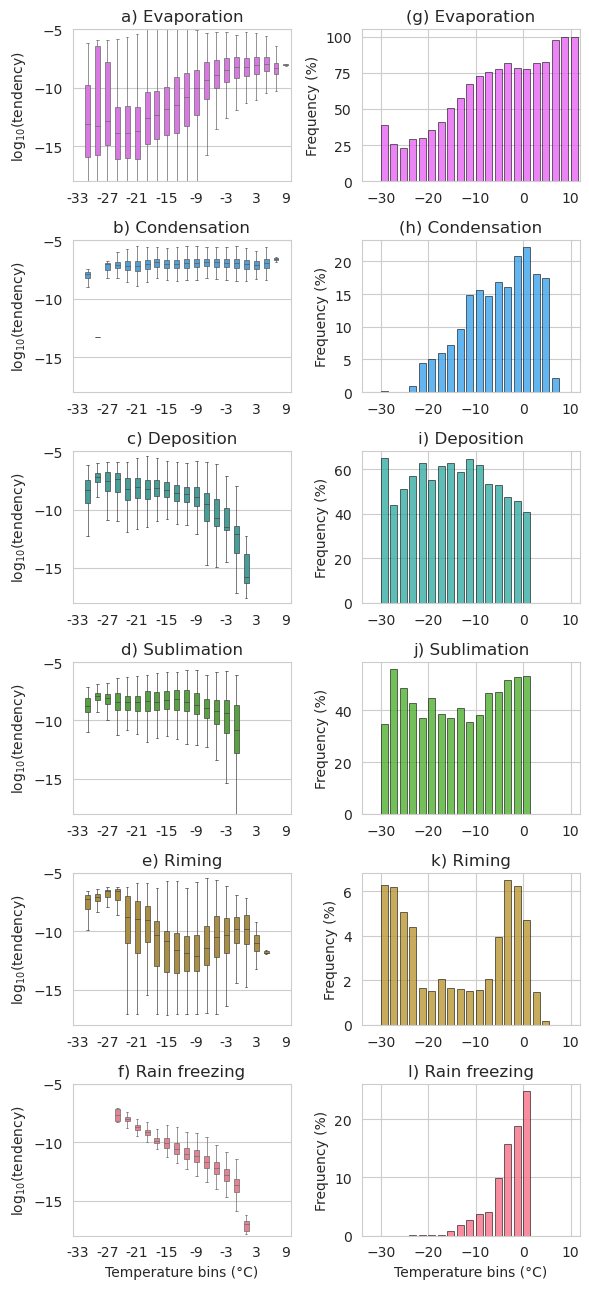

In [7]:
# create for each process a plot showing the mean, and interquartile range for each temperature bin
# use the boxplot function from seaborn. Only use df_fr_tends where deposition > 0  
# the figure should have 2 rows and 3 columns
# use the same temperature bins as before
sns.set_style('whitegrid')

nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 13))
xtick_step = 3


# For liquid processes
for i, process in enumerate(proc_list_sel_T_li):

    df_sub = df_li_tends[np.abs(df_li_tends[process]) > 0]
    # convert to log scale
    df_sub[process] = np.abs(df_sub[process])
    df_sub[process] = np.log10(df_sub[process])

    bx = sns.boxplot(ax=axes[i,0], x='T_bins', y=process, data=df_sub,
                color=color_map[i], fliersize=1, width=0.5, linewidth=0.5, showfliers=False)
    
    axes[i,0].set_ylim(-18, -5)
    # Set the xticks and labels for every third value
    axes[i,0].set_xticks(np.arange(0, len(temp_bins_labels), xtick_step))
    axes[i,0].set_xticklabels(temp_bins_labels[::xtick_step])
    axes[i,0].set_title(chr(97+i) + ") "+proc_names_sel_T_li[i])
    axes[i,0].set_ylabel(r'log$_{10}$(tendency)')
    axes[i,0].set_xlabel('')

    # plot with frequency of occurence
    df_sub = df_li_tends_perc[df_li_tends_perc[process] > 1]
    relative_occ = df_sub['T_bins'].value_counts().sort_index()/df_li_tends_perc['T_bins'].value_counts().sort_index()*100
    axes[i, 1].bar(temp_bins[1:],relative_occ, color=color_map[i], width=1.5, align='edge', 
                           edgecolor='black', linewidth=0.5, alpha=0.8, label=process)
    axes[i,1].set_title("(" + chr(97+i+6) + ") "+proc_names_sel_T_li[i])
    axes[i,1].set_ylabel('Frequency (%)')
    axes[i,1].set_xlabel('')
    axes[i,1].set_xlim(-34, 12)

# for frozen processes
for i, process in enumerate(proc_list_sel_T_fr):
    i += 2

    df_sub = df_fr_tends[np.abs(df_fr_tends[process]) > 0]
    # convert to log scale
    df_sub[process] = np.abs(df_sub[process])
    df_sub[process] = np.log10(df_sub[process])

    bx = sns.boxplot(ax=axes[i ,0], x='T_bins', y=process, data=df_sub,
                color=color_map[i], fliersize=1, width=0.5, linewidth=0.5, showfliers=False)
    axes[i, 0].set_ylim(-18, -5)
    # Set the xticks and labels for every third value
    axes[i, 0].set_xticks(np.arange(0, len(temp_bins_labels), xtick_step))
    axes[i, 0].set_xticklabels(temp_bins_labels[::xtick_step])
    axes[i,0].set_title(chr(97+i) + ") "+ proc_names_sel_T_fr[i-2])
    axes[i,0].set_ylabel(r'log$_{10}$(tendency)')
    axes[i,0].set_xlabel('')
    axes[5,0].set_xlabel('Temperature bins (°C)')    
    # remove process var
    df_sub = df_sub.drop(process, axis=1)

    # plot with frequency of occurence
    df_sub = df_fr_tends_perc[df_fr_tends_perc[process] > 1]
    relative_occ = df_sub['T_bins'].value_counts().sort_index()/df_fr_tends_perc['T_bins'].value_counts().sort_index()*100
    axes[i, 1].bar(temp_bins[1:],relative_occ, color=color_map[i], width=1.5, align='edge', 
                           edgecolor='black', linewidth=0.5, alpha=0.8, label=process)
    # add letters of the alphabet according to i to the process name as a), b), c) etc.
    axes[i ,1].set_title(chr(97+i+6) + ") "+ proc_names_sel_T_fr[i-2])
    axes[i ,1].set_ylabel('Frequency (%)')
    axes[i ,1].set_xlabel('')
    axes[5,1].set_xlabel('Temperature bins (°C)')
    axes[i,1].set_xlim(-34, 12)
    
plt.tight_layout()

plt.savefig(fig_path+'/fig_03_proc_vs_temp_pn_pd_nooutliers.pdf', dpi=300,
             bbox_inches='tight', pad_inches=0.1, format='pdf' )


plt.show()
